# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time, json, csv

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
c_data = []
record_count = 1
set_count = 1

print("Beginning Data Retrieval")
print("------------------------")
for i,city in enumerate(cities):
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&APPID=" + api_key + "&units=Imperial"
    if (i%50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1
    try:
        city_weather = rq.get(url).json()
        c_data.append({
            "city" : city,
            "Lat" : city_weather["coord"]["lat"],
            "Lon" : city_weather["coord"]["lon"],
            "Max Temp" : city_weather["main"]["temp_max"],
            "Humidity" : city_weather["main"]["humidity"],
            "Cloudiness" : city_weather["clouds"]["all"],
            "Wind Speed" : city_weather["wind"]["speed"],
            "Country" : city_weather["sys"]["country"],
            "Date" : city_weather["dt"]
        })
    except:
        print("City not found. Skipping...")
        pass
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | aklavik
Processing Record 2 of Set 1 | zlocieniec
Processing Record 3 of Set 1 | fukue
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | adrar
Processing Record 7 of Set 1 | lata
Processing Record 8 of Set 1 | rundu
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | camocim
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | ostrovnoy
Processing Record 13 of Set 1 | klaksvik
Processing Record 14 of Set 1 | pochutla
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | sabla
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | campbell river
Processing Record 23 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
c_df = pd.DataFrame(c_data).rename(columns = {'city' : 'City', 'Lon' : 'Lng'}).sort_index(axis=1)
c_df.to_csv('cities.csv')
c_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,aklavik,20,CA,1578350547,66,68.22,-135.01,-31.00,2.24
1,zlocieniec,92,PL,1578350692,96,53.53,16.01,37.00,1.01
2,fukue,75,JP,1578350693,65,35.03,136.69,42.80,6.93
3,rikitea,95,PF,1578350693,74,-23.12,-134.97,76.91,12.15
4,adrar,39,DZ,1578350693,29,27.87,-0.29,48.20,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

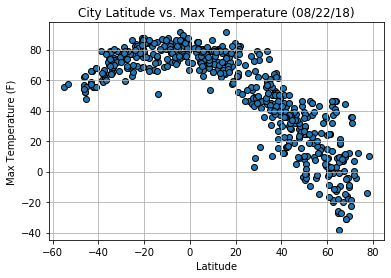

In [5]:
x = c_df['Lat']
y_1 = c_df['Max Temp']

plt.scatter(x, y_1, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Max Temperature (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#Save and Show Figure
plt.savefig('lat_vs_max_temp.png')

#### Latitude vs. Humidity Plot

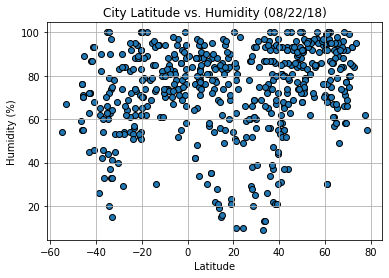

In [6]:
y_2 = c_df['Humidity']

plt.scatter(x, y_2, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Humidity (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Save and Show Figure
plt.savefig('lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

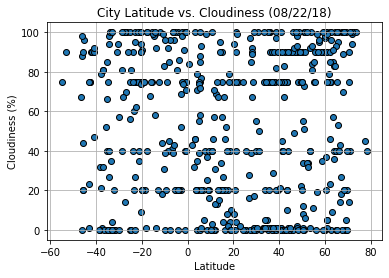

In [7]:
y_3 = c_df['Cloudiness']

plt.scatter(x, y_3, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Cloudiness (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Save and Show Figure
plt.savefig('lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

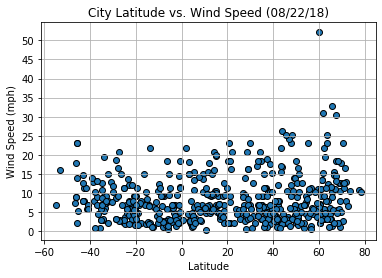

In [8]:
y_4 = c_df['Wind Speed']

plt.scatter(x, y_4, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Wind Speed (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.yticks(np.arange(0, 55, 5))

#Save and Show Figure
plt.savefig('lat_vs_wind_speed.png')